# Step 1: Define Objectives

In [52]:

def define_objectives():
    objectives = {
        "segment": "customers",
        "target": "increase market share",
        "identify": "distinct customer segments"
    }
    return objectives

objectives = define_objectives()
print(objectives)


{'segment': 'customers', 'target': 'increase market share', 'identify': 'distinct customer segments'}


# Step 2: Select Segmentation Variables

In [53]:
import pandas as pd

# Load the data
data = pd.read_csv('mcdonalds.csv')

def select_segmentation_variables(data):
    return data.select_dtypes(include=['number']).columns.tolist()

segmentation_vars = select_segmentation_variables(data)
print(segmentation_vars)


['Age']


# Step 3: Collect Data

In [65]:
##This step is already covered by loading the CSV file in Step 2, so we can consider it completed.

# Step 4: Explore Data

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
               Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000
<class 'pandas.core.frame.Data

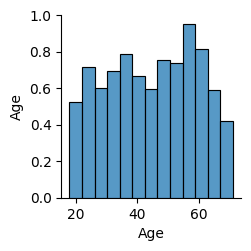

In [54]:

import seaborn as sns
import matplotlib.pyplot as plt

def explore_data(data):
    print(data.head())
    print(data.describe())
    print(data.info())
    sns.pairplot(data)
    plt.show()

explore_data(data)


# Step 5: Extract Segments

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def extract_segments(data, n_clusters=3):
    scaler = StandardScaler()
    numeric_data = data.select_dtypes(include=['number'])
    scaled_data = scaler.fit_transform(numeric_data)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Segment'] = kmeans.fit_predict(scaled_data)
    return data, kmeans, scaled_data

data, kmeans, scaled_data = extract_segments(data, n_clusters=3)
print(data['Segment'].value_counts())


Segment
0    518
2    480
1    455
Name: count, dtype: int64


# Step 6: Profile Segments

In [56]:
def profile_segments(data):
    numeric_columns = data.select_dtypes(include=['number']).columns
    segment_profiles = data.groupby('Segment')[numeric_columns].mean()
    return segment_profiles

segment_profiles = profile_segments(data)
print(segment_profiles)


               Age  Segment
Segment                    
0        28.608108      0.0
1        45.837363      1.0
2        60.700000      2.0


# Step 7: Describe Segments

In [57]:
def describe_segments(segment_profiles):
    print(segment_profiles)

describe_segments(segment_profiles)


               Age  Segment
Segment                    
0        28.608108      0.0
1        45.837363      1.0
2        60.700000      2.0


# Step 8: Select Target Segment

In [58]:
def select_target_segment(data, criteria='size'):
    if criteria == 'size':
        target_segment = data['Segment'].value_counts().idxmax()
    else:
        target_segment = data.groupby('Segment').mean().sort_values(by=criteria, ascending=False).index[0]
    return target_segment

target_segment = select_target_segment(data, criteria='size')
print(f"Target Segment: {target_segment}")


Target Segment: 0


# Step 9: Implement Segmentation Strategy

In [59]:
def implement_strategy(target_segment):
    print(f"Implementing strategy for target segment: {target_segment}")

implement_strategy(target_segment)


Implementing strategy for target segment: 0


# Step 10: Evaluation and Monitoring

KMeans Inertia: 178.44495978923584


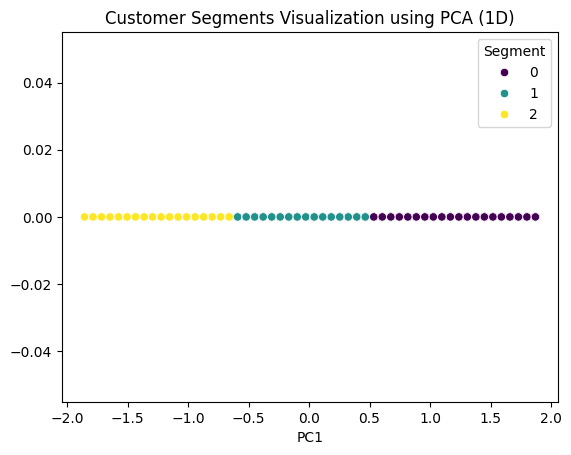

In [60]:
from sklearn.decomposition import PCA

def evaluate_and_monitor(data, kmeans, scaled_data):
    inertia = kmeans.inertia_
    print(f"KMeans Inertia: {inertia}")
    
    # Apply PCA for visualization
    num_features = scaled_data.shape[1]
    n_components = min(2, num_features)
    
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(scaled_data)
    pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_df['Segment'] = data['Segment']
    
    # Plot PCA results
    if n_components == 2:
        sns.scatterplot(x='PC1', y='PC2', hue='Segment', data=pca_df, palette='viridis')
        plt.title('Customer Segments Visualization using PCA')
    else:
        sns.scatterplot(x='PC1', y=[0]*len(pca_df), hue='Segment', data=pca_df, palette='viridis')
        plt.title('Customer Segments Visualization using PCA (1D)')
    
    plt.show()

evaluate_and_monitor(data, kmeans, scaled_data)
